In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.signal as signal

In [2]:
film = img.imread('bubble lab.jpg');
plt.imshow(film);
#importing the image of my film

FileNotFoundError: [Errno 2] No such file or directory: 'bubble lab.jpg'

In [ ]:
cropped_img = film[500:1600, 1000:1100, :]
plt.imshow(cropped_img);
#selecting a vertical coloum of pixels with which to start my analysis

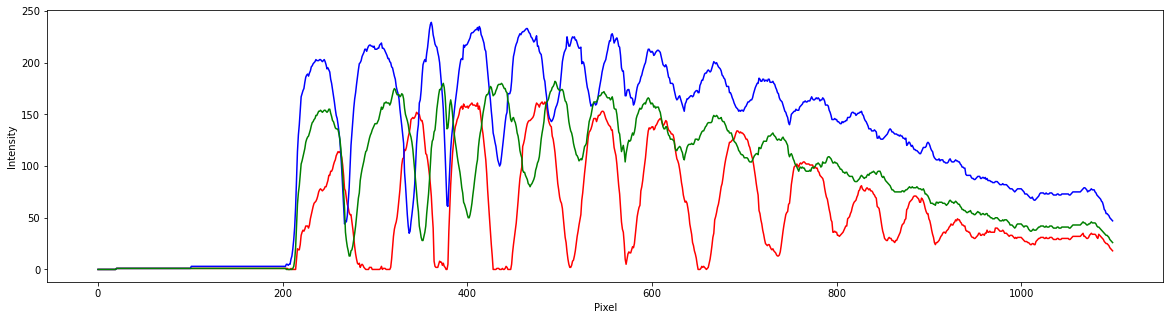

In [4]:
red = cropped_img[:,50,0]
green = cropped_img[:,50,1]
blue = cropped_img[:,50,2]

plt.figure(figsize=(20,5));
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.plot(red, 'r');
plt.plot(blue, 'b');
plt.plot(green, 'g');
#this is the intensity of my red, blue, and green fringes.

In [6]:
R_N = red / np.max(red)
G_N = green / np.max(green)
B_N = blue / np.max(blue)
#here I am dividing by the maximum intensity to normalize all three of my intensity arrays

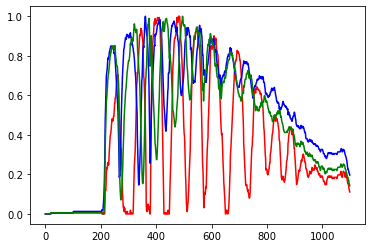

In [7]:
plt.plot(R_N, 'r');
plt.plot(B_N, 'b');
plt.plot(G_N, 'g');

In [8]:
R_min = signal.find_peaks(np.ones(len(R_N)) - R_N, height = 0.5, distance=50) [0]
G_min = signal.find_peaks(np.ones(len(G_N)) - G_N, height = 0.2, distance=40) [0]
B_min = signal.find_peaks(np.ones(len(B_N)) - B_N, height = 0.2, distance=40) [0]
#this is finding my minima, and assigning them to an array.

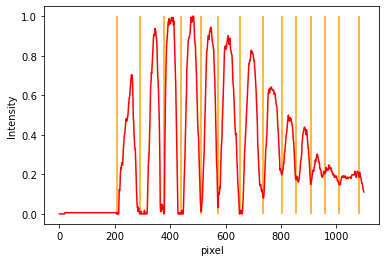

In [9]:
plt.plot(R_N, 'r');
plt.vlines(R_min, 0, 1, 'orange');
plt.xlabel('pixel');
plt.ylabel('Intensity');

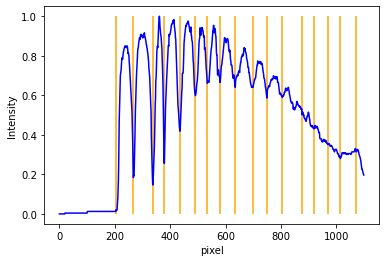

In [10]:
plt.plot(B_N, 'b');
plt.vlines(B_min, 0, 1, 'orange');
plt.xlabel('pixel');
plt.ylabel('Intensity');

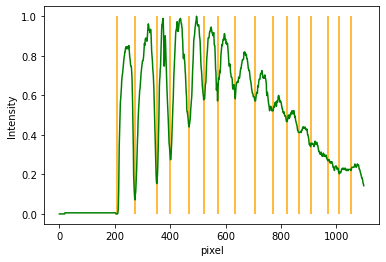

In [11]:
plt.plot(G_N, 'g');
plt.vlines(G_min, 0, 1, 'orange');
plt.xlabel('pixel');
plt.ylabel('Intensity');

In [12]:
R_min = R_min[(200 < R_min) & (R_min <800)]
B_min = B_min[(200 < B_min) & (B_min <800)]
G_min = G_min[(200 < G_min) & (G_min <800)]
#The range of peaks really start after 200 and after 800 pixels they get kind of noisy so I will just remove those from my 
#range of minima

In [13]:
red_lambda = 620
blue_lambda = 465
green_lambda = 520
d_red = []
d_green = []
d_blue = []

for i in range(len(R_min)):
    d_red.append(red_lambda * i * .5)
for j in range(len(G_min)):
    d_green.append(green_lambda * j * .5)
for k in range(len(B_min)):
    d_blue.append(blue_lambda * k * .5)
    
d_red = np.array(d_red)
d_blue = np.array(d_blue)
d_green = np.array(d_green)

In [14]:
d = np.concatenate((d_red, d_green, d_blue))
minima = np.concatenate((R_min, G_min, B_min))
min_sort = np.argsort(minima)
minima = minima[min_sort]
d = d[min_sort]
error_red = [2.5 * i + d_red[i] * .04 for i in range(len(d_red))]
error_green = [2.5 * j + d_green[j] * .04 for j in range(len(d_green))]
error_blue = [2.5 * k +d_blue[k] * .04 for k in range(len(d_blue))]
# here I am assigning error. My error changes as a function of d (thickness)

In [15]:
cm = 75/2000
minima = minima * cm
polyfit = np.polyfit(minima, d, 2)
#Here I am putting my minima in terms of cm instead of pixels, and then using a polyfit to fit my datapoints

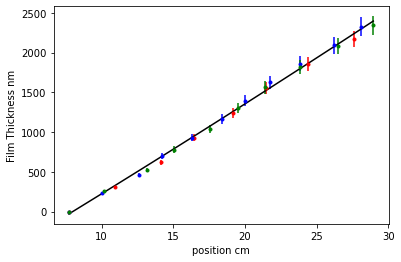

In [16]:
plt.errorbar(R_min * cm, d_red, error_red, fmt='.r')
plt.errorbar(B_min * cm, d_blue, error_blue, fmt='.b')
plt.errorbar(G_min * cm, d_green, error_green, fmt='.g')
plt.plot(minima, polyfit[0] * minima**2 + polyfit[1] * minima + polyfit[2], 'k')
plt.ylabel('Film Thickness nm');
plt.xlabel('position cm');